In [1]:
!pip install ydata-profiling --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import mutual_info_regression
from ydata_profiling import ProfileReport

In [3]:
data = {
    'Tanggal': ['2025-05-01', '2025-05-02', '2025-05-03', '2025-05-04'],
    'Lokasi': ['Sungai A', 'Sungai B', 'Sungai C', 'Sungai D'],
    'pH': [7.2, 6.8, 7.5, 6.5],
    'TDS': [250, 300, 280, 320],
    'Kekeruhan': [10, 15, 5, 20]
}
df = pd.DataFrame(data)

In [4]:
df.to_csv('kualitas_air.csv', index=False)
df = pd.read_csv('kualitas_air.csv')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

In [6]:
def hitung_indeks_kualitas_air(row):
    score = 0
    if 6.5 <= row['pH'] <= 8.5:
        score += 1
    if row['TDS'] <= 300:
        score += 1
    if row['Kekeruhan'] <= 15:
        score += 1
    return score

df['Indeks_Kualitas_Air'] = df.apply(hitung_indeks_kualitas_air, axis=1)

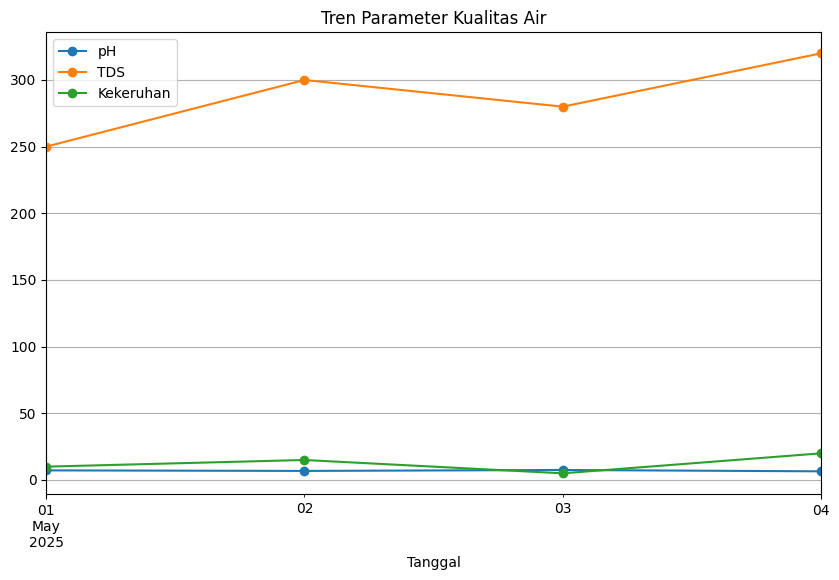

In [7]:
df.set_index('Tanggal')[['pH', 'TDS', 'Kekeruhan']].plot(marker='o', figsize=(10, 6))
plt.title("Tren Parameter Kualitas Air")
plt.grid(True)
plt.show()

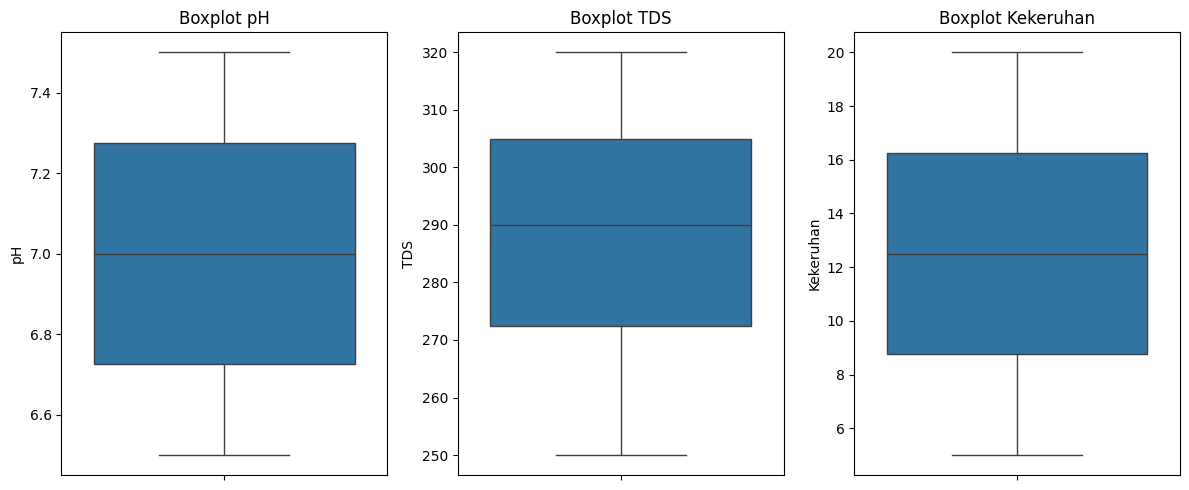

In [8]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(['pH', 'TDS', 'Kekeruhan']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [9]:
imputer = KNNImputer(n_neighbors=2)
df[['pH', 'TDS', 'Kekeruhan']] = imputer.fit_transform(df[['pH', 'TDS', 'Kekeruhan']])

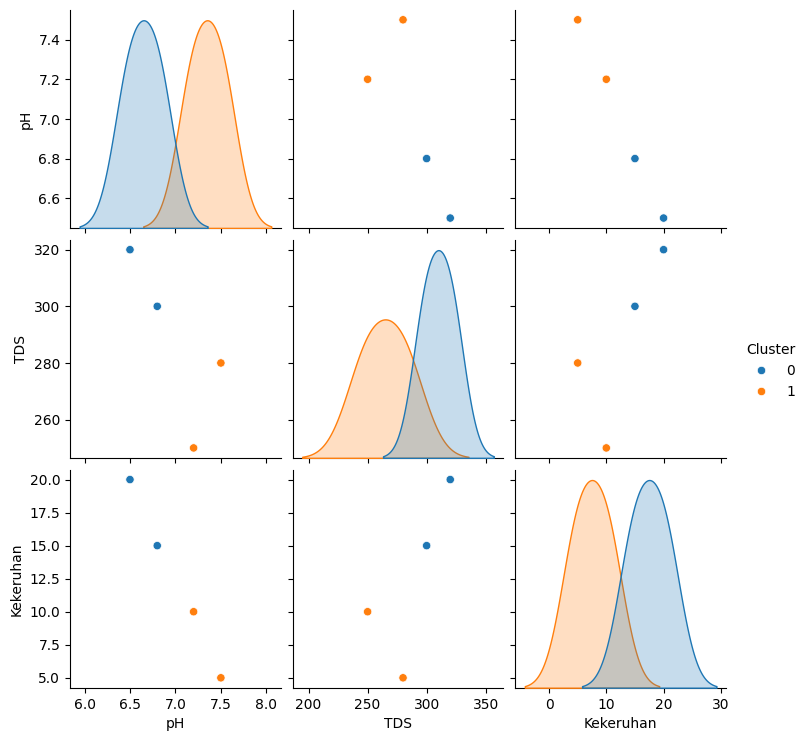

In [10]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['pH', 'TDS', 'Kekeruhan']])
sns.pairplot(df, hue='Cluster', vars=['pH', 'TDS', 'Kekeruhan'])
plt.show()

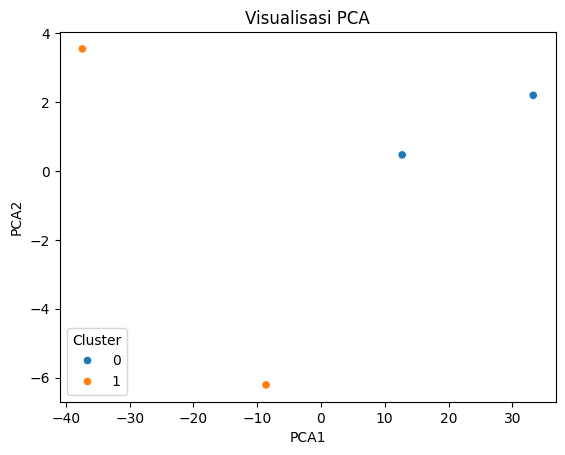

In [11]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['pH', 'TDS', 'Kekeruhan']])
df[['PCA1', 'PCA2']] = pca_result
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster')
plt.title("Visualisasi PCA")
plt.show()

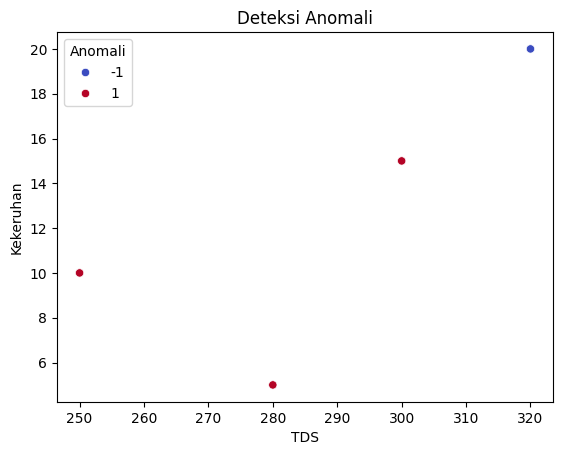

In [12]:
iso = IsolationForest(contamination=0.1)
df['Anomali'] = iso.fit_predict(df[['pH', 'TDS', 'Kekeruhan']])
sns.scatterplot(data=df, x='TDS', y='Kekeruhan', hue='Anomali', palette='coolwarm')
plt.title("Deteksi Anomali")
plt.show()

In [14]:
mi = mutual_info_regression(df[['pH', 'TDS']], df['Kekeruhan'])
print("Mutual Information antara fitur dan Kekeruhan:", mi)

Mutual Information antara fitur dan Kekeruhan: [0 0]


In [15]:
scaler = MinMaxScaler()
df[['pH', 'TDS', 'Kekeruhan']] = scaler.fit_transform(df[['pH', 'TDS', 'Kekeruhan']])

In [16]:
df_encoded = pd.get_dummies(df, columns=['Lokasi'], drop_first=True)

In [18]:
profile = ProfileReport(df, title="Laporan Profiling Kualitas Air", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 22.69it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
!pip install openpyxl

In [21]:
with pd.ExcelWriter("kualitas_air_laporan.xlsx", engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name="Data Analisis", index=False)
    df_encoded.to_excel(writer, sheet_name="Data Encoding", index=False)

In [22]:
from google.colab import files
files.download("kualitas_air_laporan.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>